In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn.svm
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy
import matplotlib.pyplot
  
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [3]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
attacks_types = {
    'normal': '1',
'back': '2',
'buffer_overflow': '3',
'ftp_write': '4',
'guess_passwd': '4',
'imap': '4',
'ipsweep': '5',
'land': '2',
'loadmodule': '3',
'multihop': '4',
'neptune': '2',
'nmap': '5',
'perl': '3',
'phf': '4',
'pod': '2',
'portsweep': '5',
'rootkit': '3',
'satan': '5',
'smurf': '2',
'spy': '4',
'teardrop': '2',
'warezclient': '4',
'warezmaster': '4',
}

In [5]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)
 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [6]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [7]:
df['Attack Type'].value_counts()

2    391458
1     97278
5      4107
4      1126
3        52
Name: Attack Type, dtype: int64

In [8]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'service', 'protocol_type']

In [9]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [10]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [11]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [12]:
df.drop('service',axis = 1,inplace= True)

In [13]:
df.drop('target',axis = 1,inplace= True)

In [14]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


In [15]:
#FCM

In [16]:
import numpy as np, numpy.random
import pandas as pd
from scipy.spatial import distance
k = 2
p = 5
dat = df.drop(['Attack Type',], axis=1)

In [17]:
n = len(dat)
d = len(dat.columns)
addZeros = np.zeros((n, 1))
dat = np.append(dat, addZeros, axis=1)
print("The FCM algorithm: \n")
print("The training data: \n", dat)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters: ",k)

The FCM algorithm: 

The training data: 
 [[0.   1.   0.   ... 0.11 0.   0.  ]
 [0.   1.   0.   ... 0.05 0.   0.  ]
 [0.   1.   0.   ... 0.03 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 0.  ]
 [0.   1.   0.   ... 0.04 0.05 0.  ]
 [0.   1.   0.   ... 0.17 0.05 0.  ]]

Total number of data:  494021
Total number of features:  32
Total number of Clusters:  2


In [18]:
C = np.zeros((k,d+1))
C

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [19]:
weight = np.random.dirichlet(np.ones(k),size=n)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.85 0.15]
 [0.71 0.29]
 [0.55 0.45]
 ...
 [0.06 0.94]
 [0.2  0.8 ]
 [0.92 0.08]]


In [20]:
for it in range(3): # Total number of iterations
    
    # Compute centroid
    for j in range(k):
        denoSum = sum(np.power(weight[:,j],2))
        
        sumMM =0
        for i in range(n):
            mm = np.multiply(np.power(weight[i,j],p),dat[i,:])
            sumMM +=mm
        cc = sumMM/denoSum
        C[j] = np.reshape(cc,d+1)
 
    #Updating the fuzzy pseudo partition
    for i in range(n):
        denoSumNext = 0
        for j in range(k):
             denoSumNext += np.power(1/distance.euclidean(C[j,0:d], dat[i,0:d]),1/(p-1))
        for j in range(k):
            w = np.power((1/distance.euclidean(C[j,0:d], dat[i,0:d])),1/(p-1))/denoSumNext
            weight[i,j] = w

In [21]:
print("\nThe final weights: \n", np.round(weight,2))


The final weights: 
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [22]:
for i in range(n):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    dat[i,d] = cNumber[0]
    
print("\nThe data with cluster number: \n", dat)


The data with cluster number: 
 [[0.   1.   0.   ... 0.11 0.   1.  ]
 [0.   1.   0.   ... 0.05 0.   0.  ]
 [0.   1.   0.   ... 0.03 0.   1.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 1.  ]
 [0.   1.   0.   ... 0.04 0.05 1.  ]
 [0.   1.   0.   ... 0.17 0.05 1.  ]]


In [23]:
cont = pd.DataFrame(dat, columns=['urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','cluster'])

In [24]:
ss = np.flatnonzero(dat[-1])

In [25]:
ss

array([ 1,  3,  4, 10, 20, 21, 24, 26, 27, 28, 30, 31, 32], dtype=int64)

In [26]:
ss.shape

(13,)

In [27]:
print(df.shape)

Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [28]:
data_inputs = X_train
data_outputs = Y_train.values.ravel()

In [29]:
#Genetic Algorithm Starting.

In [30]:
def reduce_features(solution, features):
    selected_elements_indices = numpy.where(solution == 1)[0]
    reduced_features = features[:, selected_elements_indices]
    return reduced_features


def classification_accuracy(labels, predictions):
    correct = numpy.where(labels == predictions)[0]
    accuracy = correct.shape[0]/labels.shape[0]
    return accuracy


def cal_pop_fitness(pop, features, labels, train_indices, test_indices):
    accuracies = numpy.zeros(pop.shape[0])
    idx = 0

    for curr_solution in pop:
        reduced_features = reduce_features(curr_solution, features)
        train_data = reduced_features[train_indices, :]
        test_data = reduced_features[test_indices, :]
      

        train_labels = labels[train_indices]
        test_labels = labels[test_indices]


        SV_classifier = sklearn.svm.SVC(gamma='scale')
        SV_classifier.fit(X=train_data, y=train_labels)

        predictions = SV_classifier.predict(test_data)
        accuracies[idx] = classification_accuracy(test_labels, predictions)
        idx = idx + 1
    return accuracies

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, num_mutations=2):
    mutation_idx = numpy.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]
    return offspring_crossover

In [31]:
num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]

In [32]:
train_indices = numpy.arange(1, num_samples, 4)
test_indices = numpy.arange(0, num_samples, 4)
print(test_indices.shape)
test_indices.shape
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

(82749,)
Number of training samples:  82749
Number of test samples:  82749


In [33]:
"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""

'\nGenetic algorithm parameters:\n    Population size\n    Mating pool size\n    Number of mutations\n'

In [34]:
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

In [35]:
# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

In [36]:
# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)

(8, 32)


In [37]:
start_time = time.time()
best_outputs = []
num_generations = 1
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
end_time = time.time()

Generation :  0
Best result :  0.9953352910609191


In [38]:
ga_train = end_time - start_time
ga_train

301.33800196647644

In [39]:
start_time = time.time()
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]
end_time = time.time()
ga_best_sol = end_time - start_time

In [40]:
ga_best_sol

254.93082475662231

In [41]:
best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

In [42]:
print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

best_match_idx :  0
best_solution :  [0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1]
Selected indices :  [ 2  6  7  8  9 12 13 18 19 20 21 22 25 28 29 31]
Number of selected elements :  16
Best solution fitness :  0.9953352910609191


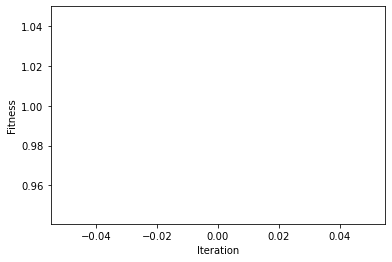

In [43]:
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [44]:
best_solution_indices

array([ 2,  6,  7,  8,  9, 12, 13, 18, 19, 20, 21, 22, 25, 28, 29, 31],
      dtype=int64)

In [45]:
best_solution_indices.shape

(16,)

In [46]:
ss

array([ 1,  3,  4, 10, 20, 21, 24, 26, 27, 28, 30, 31, 32], dtype=int64)

In [47]:
len(ss)

13

In [48]:
ind = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

In [49]:
st = []
for i in ind:
    if i not in ss:
        st.append(i)
len(st)

20

In [50]:
st.sort()

In [51]:
st

[0, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 29]

In [52]:
ifs = []

In [53]:
type(ifs)

list

In [54]:
len(best_solution_indices)

16

In [55]:
best_solution_indices

array([ 2,  6,  7,  8,  9, 12, 13, 18, 19, 20, 21, 22, 25, 28, 29, 31],
      dtype=int64)

In [56]:
ss

array([ 1,  3,  4, 10, 20, 21, 24, 26, 27, 28, 30, 31, 32], dtype=int64)

In [57]:
st

[0, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 29]

In [58]:
b = []

In [59]:
a = best_solution_indices.tolist()
#a = []

In [60]:
if len(ss)<len(st):
    for i in ss:
        if i not in best_solution_indices:
            a.append(i)
else: 
    for i in st:
        if i not in best_solution_indices:
            a.append(i)

In [61]:
a.sort()
b.sort()

In [62]:
a = numpy.array(a)
b = numpy.array(b)

In [63]:
a

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 13, 18, 19, 20, 21, 22, 24,
       25, 26, 27, 28, 29, 30, 31, 32], dtype=int64)

In [64]:
b

array([], dtype=float64)

In [65]:
c = np.concatenate((a,b),axis=0)

In [66]:
len(c)

25

In [67]:
for i in c:
    if i not in best_solution_indices:
        d = i

In [68]:
d

32.0

In [69]:
#check score of cluster1

In [71]:
testObj = pd.DataFrame(df)
clus1= testObj.iloc[:,a]
clus2 = testObj.iloc[:,b]

In [72]:
clus1

,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,root_shell,...,serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,1,0,181,5450,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,1,0,239,486,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,1,0,235,1337,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,1,0,219,1337,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,1,0,217,2032,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,0,310,1881,0,0,0,0,1,0,...,0.00,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,1,0,282,2286,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,1,0,203,1200,0,0,0,0,1,0,...,0.17,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,1,0,291,1200,0,0,0,0,1,0,...,0.00,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


In [73]:
clus2 

""
0
1
2
3
4
...
494016
494017
494018
494019


In [74]:
# Target variable and train set
Y = df[['Attack Type']]
X = clus1

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 25) (163027, 25)
(330994, 1) (163027, 1)


In [75]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)
start_time = time.time()
rf = model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
rf_train_time = end_time-start_time

In [76]:
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
rf_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)

Training time:  4.015001058578491
Testing time:  0.2818453311920166


In [77]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 1.0
Test score is: 0.9999938660467285


In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(clus1)

In [79]:
kc = kmeans.cluster_centers_
kc

array([[0.0000000e+00, 0.0000000e+00, 1.0320000e+03, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.1100000e+02, 5.1100000e+02, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.5500000e+02,
        2.5500000e+02, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00],
       [1.0000000e+00, 4.0000000e+00, 6.9337564e+08, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.7000000e+01, 3.0000000e+00, 7.9000000e-01,
        5.0000000e-02, 3.9000000e-01, 0.0000000e+00, 2.5500000e+02,
        3.0000000e+00, 9.0000000e-02, 2.2000000e-01, 0.0000000e+00,
        5.0000000e+00]])

In [80]:
ks = sum(kc)
ks = ks.tolist()
ks = sum(ks)
kv = ks/len(kc)
kv

346689269.27

In [81]:
print (kmeans.score(clus1))

-2220972723919242.2


In [82]:
testObj = pd.DataFrame(df)
tes= testObj.iloc[:,a]

In [83]:
tes

,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,root_shell,...,serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,1,0,181,5450,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,1,0,239,486,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,1,0,235,1337,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,1,0,219,1337,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,1,0,217,2032,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,0,310,1881,0,0,0,0,1,0,...,0.00,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,1,0,282,2286,0,0,0,0,1,0,...,0.00,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,1,0,203,1200,0,0,0,0,1,0,...,0.17,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,1,0,291,1200,0,0,0,0,1,0,...,0.00,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


In [84]:
print(tes.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = clus1

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 25)
(330994, 25) (163027, 25)
(330994, 1) (163027, 1)


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
model3 = RandomForestClassifier(n_estimators=30)

In [87]:
start_time = time.time()
rf = model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
rf_train_time = end_time-start_time

In [88]:
print("Training time: ",end_time-start_time)

Training time:  4.179790258407593


In [89]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
rf_test_time = end_time-start_time

In [90]:
print("Testing time: ",end_time-start_time)

Testing time:  0.2877938747406006


In [91]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 1.0
Test score is: 0.9999938660467285


In [92]:
X = clus1
Y = df[['Attack Type']]

In [93]:
td = clus1

In [94]:
lm = 16
len_c = len(td.columns)
red_count = len_c-lm
count = 0
for i in range(red_count):
    count +=1
    td = td.iloc[:,:-1]
X = td

In [95]:
X

,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,count,srv_count,serror_rate
0,1,0,181,5450,0,0,0,0,1,0,0,0,0,8,8,0.00
1,1,0,239,486,0,0,0,0,1,0,0,0,0,8,8,0.00
2,1,0,235,1337,0,0,0,0,1,0,0,0,0,8,8,0.00
3,1,0,219,1337,0,0,0,0,1,0,0,0,0,6,6,0.00
4,1,0,217,2032,0,0,0,0,1,0,0,0,0,6,6,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,0,310,1881,0,0,0,0,1,0,0,0,0,4,5,0.00
494017,1,0,282,2286,0,0,0,0,1,0,0,0,0,6,6,0.00
494018,1,0,203,1200,0,0,0,0,1,0,0,0,0,6,18,0.17
494019,1,0,291,1200,0,0,0,0,1,0,0,0,0,6,12,0.00


In [96]:
X = X.values.reshape(-1,4,4,1)

print("x_train shape: ",X.shape)

x_train shape:  (494021, 4, 4, 1)


In [97]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y = to_categorical(Y, num_classes = 10)
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 4, 4, 1) (163027, 4, 4, 1)
(330994, 10) (163027, 10)


In [101]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import tensorflow

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = (4,4,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [102]:
model.add(Dense(10, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [103]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy",tensorflow.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [104]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [105]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [106]:
start_time = time.time()
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)
end_time = time.time()
cnn_train_time = end_time-start_time
cnn_accuracy = history.history['accuracy']


C:\Users\BadWolf\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1323/1323 [==============================] - 42s 31ms/step - loss: 0.8055 - accuracy: 0.9469 - false_negatives: 144012.0000 - false_positives: 4171.0000 - precision: 0.9782 - recall: 0.5646 - val_loss: 0.2801 - val_accuracy: 0.9792 - val_false_negatives: 3404.0000 - val_false_positives: 3371.0000 - val_precision: 0.9793 - val_recall: 0.9791
Epoch 2/10
1323/1323 [==============================] - 41s 31ms/step - loss: 0.1941 - accuracy: 0.9787 - false_negatives: 7290.0000 - false_positives: 6716.0000 - precision: 0.9797 - recall: 0.9780 - val_loss: 0.1396 - val_accuracy: 0.9804 - val_false_negatives: 3273.0000 - val_false_positives: 2896.0000 - val_precision: 0.9822 - val_recall: 0.9799
Epoch 3/10
1323/1323 [==============================] - 41s 31ms/step - loss: 0.1240 - accuracy: 0.9794 - false_negatives: 7434.0000 - false_positives: 5939.0000 - precision: 0.9820 - recall: 0.9775 - val_loss: 0.1031 - val_accuracy: 0.9822 - val_false_negatives: 3272.0000 - val_false_positive

In [107]:
cnn_train_time

412.801157951355

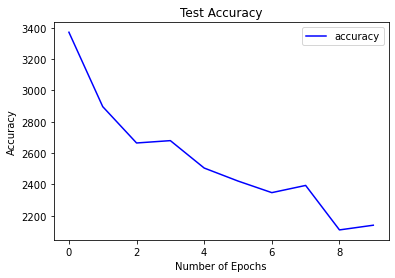

In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_false_positives'], color='b', label="accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Implementation of other models and comparison

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [112]:
# Target variable and train set
Y = df[['Attack Type']]
X = clus1

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 25) (163027, 25)
(330994, 1) (163027, 1)


In [127]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)
start_time = time.time()
rf = model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))
y_pred = rf.predict(X)

Train score is: 1.0
Test score is: 0.9999938660467285


In [ ]:
y_pred.shape

In [ ]:
confusion_matrix(Y, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [ ]:
(tn, fp, fn, tp)

In [ ]:
import sklearn.metrics as metrics
ac = metrics.accuracy_score(Y, y_pred)

In [ ]:
ac

In [ ]:
Y

In [137]:
y_pred = rf.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("classification_report", metrics.classification_report(Y, y_pred))
print ("jaccard_similarity_score", metrics.jaccard_score(Y, y_pred, average='micro'))
print ("zero_one_loss", metrics.zero_one_loss(Y, y_pred))

print ("matthews_corrcoef", metrics.matthews_corrcoef(Y, y_pred) )

accuracy 0.9999979757945513
f1 score macro 0.9999108951448129
f1 score micro 0.9999979757945513
precision score 0.9999994890908116
recall score 0.999822380106572
hamming_loss 2.024205448756227e-06
classification_report               precision    recall  f1-score   support

           1       1.00      1.00      1.00     97278
           2       1.00      1.00      1.00    391458
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00      1126
           5       1.00      1.00      1.00      4107

    accuracy                           1.00    494021
   macro avg       1.00      1.00      1.00    494021
weighted avg       1.00      1.00      1.00    494021

jaccard_similarity_score 0.9999959515972973
zero_one_loss 2.024205448702965e-06
matthews_corrcoef 0.999993926182691


In [118]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [119]:
model1 = GaussianNB()

In [120]:
start_time = time.time()
nb = model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
nb_train_time = end_time-start_time

In [125]:
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
nb_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)

Training time:  0.1741025447845459
Testing time:  0.17316222190856934


In [126]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))
nb_train_accuracy = model1.score(X_train, Y_train)
nb_test_accuracy = model1.score(X_test,Y_test)

Train score is: 1.0
Test score is: 1.0


In [135]:
import sklearn.metrics as metrics


y_pred = nb.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("classification_report", metrics.classification_report(Y, y_pred))
print ("jaccard_similarity_score", metrics.jaccard_score(Y, y_pred, average='micro'))
print ("zero_one_loss", metrics.zero_one_loss(Y, y_pred))

print ("matthews_corrcoef", metrics.matthews_corrcoef(Y, y_pred) )

accuracy 1.0
f1 score macro 1.0
f1 score micro 1.0
precision score 1.0
recall score 1.0
hamming_loss 0.0
classification_report               precision    recall  f1-score   support

           1       1.00      1.00      1.00     97278
           2       1.00      1.00      1.00    391458
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00      1126
           5       1.00      1.00      1.00      4107

    accuracy                           1.00    494021
   macro avg       1.00      1.00      1.00    494021
weighted avg       1.00      1.00      1.00    494021

jaccard_similarity_score 1.0
zero_one_loss 0.0
matthews_corrcoef 1.0


In [128]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [129]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [130]:
start_time = time.time()
dt = model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
dt_train_time = end_time-start_time
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
dt_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)


Training time:  0.4717402458190918
Testing time:  0.013988494873046875


In [131]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))
dt_train_score = model2.score(X_train, Y_train)
dt_test_score = model2.score(X_test,Y_test)

Train score is: 1.0
Test score is: 1.0


In [136]:
import sklearn.metrics as metrics


y_pred = dt.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("classification_report", metrics.classification_report(Y, y_pred))
print ("jaccard_similarity_score", metrics.jaccard_score(Y, y_pred, average='micro'))
print ("zero_one_loss", metrics.zero_one_loss(Y, y_pred))

print ("matthews_corrcoef", metrics.matthews_corrcoef(Y, y_pred) )

accuracy 1.0
f1 score macro 1.0
f1 score micro 1.0
precision score 1.0
recall score 1.0
hamming_loss 0.0
classification_report               precision    recall  f1-score   support

           1       1.00      1.00      1.00     97278
           2       1.00      1.00      1.00    391458
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00      1126
           5       1.00      1.00      1.00      4107

    accuracy                           1.00    494021
   macro avg       1.00      1.00      1.00    494021
weighted avg       1.00      1.00      1.00    494021

jaccard_similarity_score 1.0
zero_one_loss 0.0
matthews_corrcoef 1.0


In [133]:
X_train.shape

(330994, 25)